In [1]:
!git clone https://github.com/SiddheshKotwal/Predictive-Analytics-for-Corporate-Success-and-Growth.git

fatal: destination path 'Predictive-Analytics-for-Corporate-Success-and-Growth' already exists and is not an empty directory.


In [2]:
%cd Predictive-Analytics-for-Corporate-Success-and-Growth

/content/Predictive-Analytics-for-Corporate-Success-and-Growth


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
df_companies_details = pd.read_csv("/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Datasets 1/company_details/companies.csv")
df_industries = pd.read_csv("/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Datasets 1/company_details/company_industries.csv")
df_specialities = pd.read_csv("/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Datasets 1/company_details/company_specialities.csv")
df_emp_counts = pd.read_csv("/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Datasets 1/company_details/employee_counts.csv")

In [5]:
df_companies_details_emp_counts = pd.merge(df_companies_details, df_emp_counts, how='left', on='company_id')
df_companies_details_emp_counts_industries = pd.merge(df_companies_details_emp_counts, df_industries, how='left', on='company_id')
df_companies_details_emp_counts_industries_specialities = pd.merge(df_companies_details_emp_counts_industries, df_specialities, how='left', on='company_id')

In [6]:
df_companies_details_emp_counts_industries_specialities.shape

(135549, 15)

In [7]:
df_job_benefits = pd.read_csv("/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Datasets 1/job_details/benefits.csv")
df_job_industries = pd.read_csv("/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Datasets 1/job_details/job_industries.csv")
df_job_skills = pd.read_csv("/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Datasets 1/job_details/job_skills.csv")
df_salaries = pd.read_csv("/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Datasets 1/job_details/salaries.csv")

In [8]:
df_job_benefits_skills_salaries = pd.merge(df_job_benefits, df_job_skills, how='left', on='job_id')
df_job_benefits_skills_salaries = pd.merge(df_job_benefits_skills_salaries, df_salaries, how='left', on='job_id')
df_job_benefits_skills_salaries = pd.merge(df_job_benefits_skills_salaries, df_job_industries, how='left', on='job_id')

In [9]:
df_job_benefits_skills_salaries.shape

(76036, 12)

In [10]:
df_company = df_companies_details_emp_counts_industries_specialities
df_jobs = df_job_benefits_skills_salaries

In [11]:
# result_df_jobs.head()
df_jobs['skill_abr'].unique()

array(['ACCT', 'FIN', 'MGMT', 'MNFC', 'ENG', 'IT', 'ADM', 'SALE', 'DSGN',
       'ART', 'OTHR', 'RSCH', 'STRA', 'MRKT', 'LGL', 'HCPR', 'PRJM',
       'CUST', 'QA', 'PROD', nan, 'BD', 'PR', 'PRDM', 'HR', 'GENB',
       'ADVR', 'ANLS', 'WRT', 'PRCH', 'SUPL', 'EDU', 'TRNG', 'CNSL',
       'DIST', 'SCI'], dtype=object)

In [12]:
skill_mapping = {
    'PRCH': 'Purchasing',
    'SUPL': 'Supply Chain',
    'PR': 'Public Relations',
    'SCI': 'Science',
    'STRA': 'Strategy/Planning',
    'WRT': 'Writing/Editing',
    'QA': 'Quality Assurance',
    'DIST': 'Distribution',
    'PROD': 'Production',
    'PRJM': 'Project Management',
    'ADVR': 'Advertising',
    'RSCH': 'Research',
    'HR': 'Human Resources',
    'LGL': 'Legal',
    'PRDM': 'Product Management',
    'MRKT': 'Marketing',
    'EDU': 'Education',
    'TRNG': 'Training',
    'ANLS': 'Analyst',
    'FIN': 'Finance',
    'SALE': 'Sales',
    'BD': 'Business Development',
    'MGMT': 'Management',
    'MNFC': 'Manufacturing',
    'GENB': 'General Business',
    'CUST': 'Customer Service',
    'ENG': 'Engineering',
    'OTHR': 'Other',
    'CNSL': 'Consulting',
    'ACCT': 'Accounting/Auditing',
    'HCPR': 'Health Care Provider',
    'DSGN': 'Design',
    'ART': 'Art/Creative',
    'IT': 'Information Technology',
    'ADM': 'Administrative'
}

# Replace short forms with full forms in the 'skill_abr' column
df_jobs['skill_abr'] = df_jobs['skill_abr'].map(skill_mapping)

# Display the result
df_jobs.head()

,job_id,inferred,type,skill_abr,salary_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type,industry_id
0,3690843087,0,Medical insurance,Accounting/Auditing,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0
1,3690843087,0,Medical insurance,Finance,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0
2,3690843087,0,Dental insurance,Accounting/Auditing,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0
3,3690843087,0,Dental insurance,Finance,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0
4,3690843087,0,401(k),Accounting/Auditing,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0


In [13]:
df_new = pd.read_csv("/content/Predictive-Analytics-for-Corporate-Success-and-Growth/Datasets 1/maps/industries.csv")
df_jobs = pd.merge(df_jobs, df_new, on='industry_id', how='left')
df_jobs.head()

,job_id,inferred,type,skill_abr,salary_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type,industry_id,industry_name
0,3690843087,0,Medical insurance,Accounting/Auditing,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0,Accounting
1,3690843087,0,Medical insurance,Finance,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0,Accounting
2,3690843087,0,Dental insurance,Accounting/Auditing,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0,Accounting
3,3690843087,0,Dental insurance,Finance,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0,Accounting
4,3690843087,0,401(k),Accounting/Auditing,2.0,65000.0,NaN,55000.0,YEARLY,USD,BASE_SALARY,47.0,Accounting


In [14]:
df_job_postings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/job_postings.csv")
df_job_postings.replace('nan', np.nan, inplace=True)
df_job_postings.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,scraped
0,3757940104,553718.0,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,Full-time,"Little River, SC",...,NaN,Entry level,NaN,1.699090e+12,careers-demant.icims.com,0,FULL_TIME,USD,BASE_SALARY,1699138101
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,Full-time,"Beaver Dam, WI",...,NaN,NaN,NaN,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085420
2,3757938019,474443.0,"Manager, Engineering",\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,Full-time,"Bessemer, AL",...,NaN,NaN,Bachelor's Degree in Mechanical Engineering pr...,1.699080e+12,www.click2apply.net,0,FULL_TIME,NaN,NaN,1699085644
3,3757938018,18213359.0,Cook,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,Full-time,"Aliso Viejo, CA",...,NaN,Entry level,NaN,1.699080e+12,jobs.apploi.com,0,FULL_TIME,USD,BASE_SALARY,1699087461
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,Full-time,United States,...,NaN,Mid-Senior level,NaN,1.699090e+12,careers.iherb.com,0,FULL_TIME,USD,BASE_SALARY,1699085346


In [15]:

print(df_jobs.columns)
print(df_company.columns)
print(df_job_postings.columns)


Index(['job_id', 'inferred', 'type', 'skill_abr', 'salary_id', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'currency',
       'compensation_type', 'industry_id', 'industry_name'],
      dtype='object')
Index(['company_id', 'name', 'description', 'company_size', 'state', 'country',
       'city', 'zip_code', 'address', 'url', 'employee_count',
       'follower_count', 'time_recorded', 'industry', 'speciality'],
      dtype='object')
Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'scraped'],
      dtype='object')


In [16]:
df_jobs.replace('nan', np.nan, inplace=True)
df_sal = df_jobs.groupby(['industry_name'])[['min_salary', 'med_salary', 'max_salary']].mean()
df_sal.dropna(inplace=True, axis=0)
df_sal = df_sal.round(2)
df_sal.reset_index()

,industry_name,min_salary,med_salary,max_salary
0,Accounting,86039.85,11643.98,108889.92
1,Advertising Services,71838.79,80269.53,108989.67
2,Airlines and Aviation,89894.23,22231.50,106377.65
3,"Appliances, Electrical, and Electronics Manufa...",73099.65,70005.67,95988.30
4,Armed Forces,55.00,148333.33,60.00
...,...,...,...,...
100,Warehousing and Storage,22.00,54.80,25.00
101,Wellness and Fitness Services,103089.66,33437.57,128983.89
102,Wholesale,60652.93,31777.68,73744.08
103,Wholesale Building Materials,66442.60,27015.40,88125.40


### By leveraging the dataset, companies can gain insights into salary benchmarks within their respective industries. Analyzing the minimum, maximum, and average salaries enables organizations to reassess their employee compensation structures, fostering sustainable growth by staying competitive in the job market and enhancing overall employee satisfaction.

In [17]:
df_comp_post = pd.merge(df_job_postings, df_company, how='left', on='company_id')
df_comp_post.replace('nan', np.nan, inplace=True)
df_comp_post.columns

Index(['job_id', 'company_id', 'title', 'description_x', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'scraped', 'name', 'description_y', 'company_size',
       'state', 'country', 'city', 'zip_code', 'address', 'url',
       'employee_count', 'follower_count', 'time_recorded', 'industry',
       'speciality'],
      dtype='object')

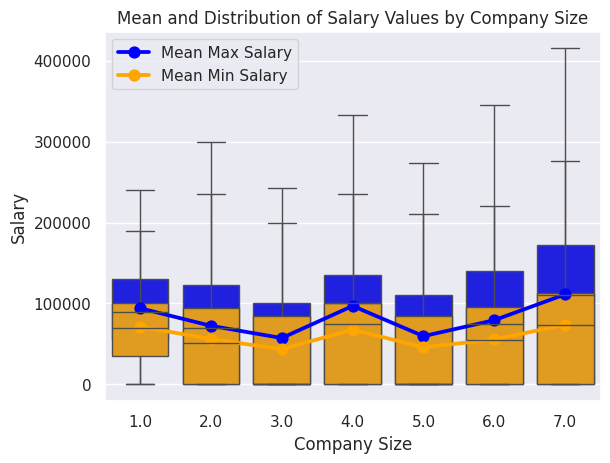

In [18]:
dist = df_comp_post.groupby(['company_size'])[['max_salary', 'min_salary']].mean().reset_index()

sns.boxplot(x='company_size', y='max_salary', data=df_comp_post, color='blue', showfliers=False)
sns.boxplot(x='company_size', y='min_salary', data=df_comp_post, color='orange', showfliers=False)

sns.pointplot(x=dist['company_size'], y=dist['max_salary'], color='blue', markers='o', label='Mean Max Salary')
sns.pointplot(x=dist['company_size'], y=dist['min_salary'], color='orange', markers='o', label='Mean Min Salary')

plt.xlabel('Company Size')
plt.ylabel('Salary')
plt.title('Mean and Distribution of Salary Values by Company Size')
plt.legend()
plt.show()


### We can see that company size has less impact on the salaries given by those companies, Average salary offered by the companies is mostly similar to all types of companies from different industries

[]

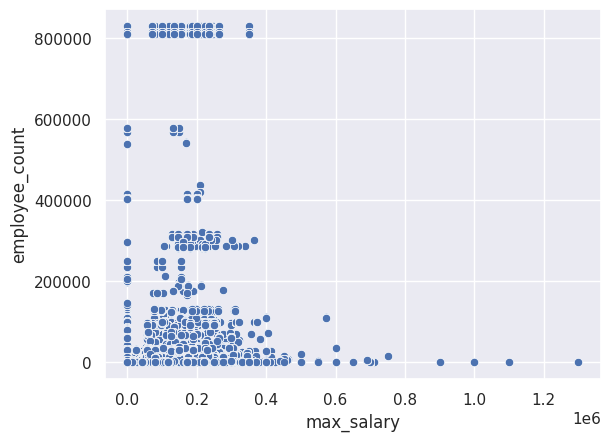

In [19]:
sns.scatterplot(x=df_comp_post['max_salary'], y=df_comp_post['employee_count'])
plt.plot()

### Salary is also less dependent on the Employee Counts of the respective Companies, irrespective of that we can see that companies with less employees has much greater salaries than the companies with greater number of employees

In [20]:
# change the industry type here and get results accordingly for below distribution of salaries based on specialities
df_temp = df_comp_post[df_comp_post['industry'] == 'Consumer Electronics'][['name', 'industry', 'min_salary', 'max_salary', 'med_salary', 'remote_allowed', 'company_size', 'employee_count', 'follower_count', 'description_x', 'skills_desc', 'speciality']]
df_dist = df_temp.groupby(['speciality'])[['min_salary', 'max_salary']].mean()
df_dist.dropna(axis=0, inplace=True)


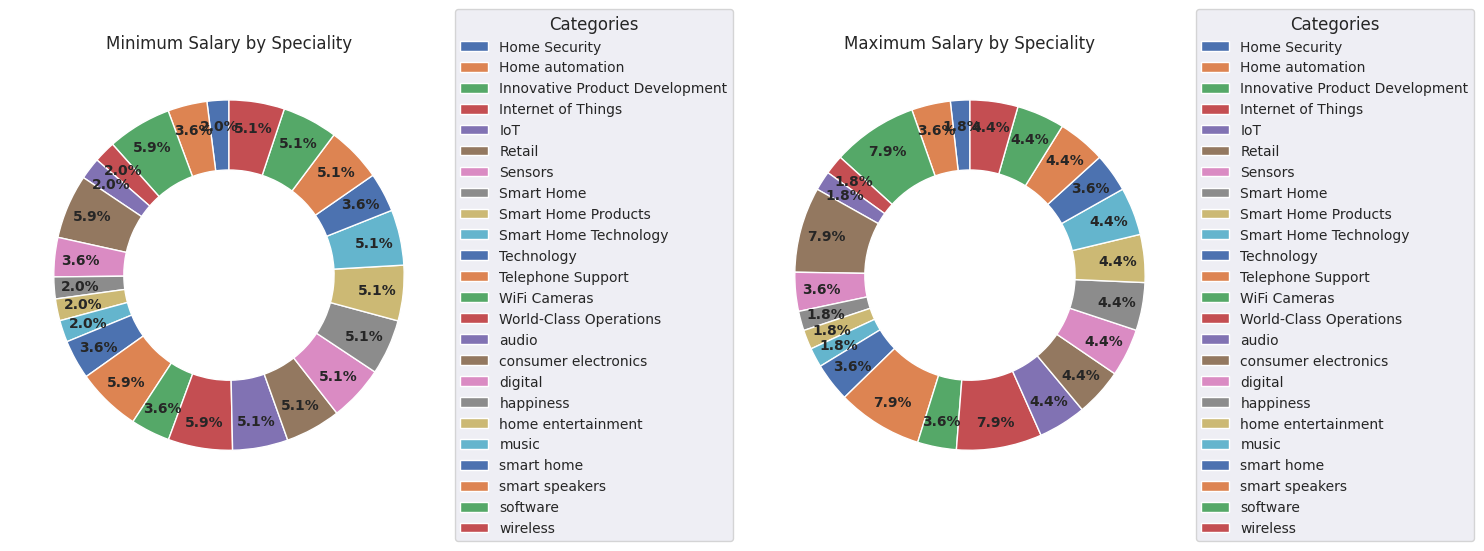

In [21]:
def donut_chart(ax, data, title, label_fontsize=7):
    wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4), pctdistance=0.85)
    plt.setp(autotexts, size=label_fontsize, weight="bold")
    ax.legend(wedges, data.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=label_fontsize)
    ax.set_title(title)

fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))

donut_chart(axs[0], df_dist['min_salary'], 'Minimum Salary by Speciality', label_fontsize=10)

donut_chart(axs[1], df_dist['max_salary'], 'Maximum Salary by Speciality', label_fontsize=10)

plt.tight_layout()
plt.show()


### You can see the Min and Max Salary for the Job positions/specialities in each Industry by changing the industry type and get insights of how the salaries are distributed among all job positions/specialities by Experienced companies working in that respective Industry.

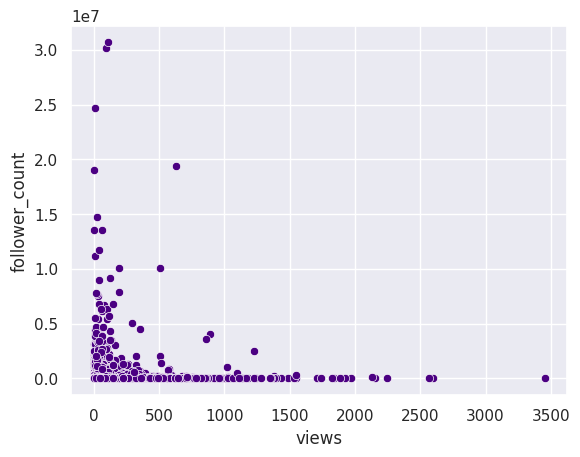

In [22]:
df_fol = df_comp_post.groupby(['name'])[['follower_count', 'views']].mean()
sns.scatterplot(y=df_fol['follower_count'], x=df_fol['views'], color='indigo', marker='o')
plt.show()

### By the above observation it is unbelievable to see that the companies with higher followers have low success rate in terms of job popularity/application rates and companies with lower follower count have more job popularity/application rates. And similar pattern is found out in case of employee count vs views

In [23]:
import plotly.express as px

df_geo = df_comp_post.groupby(['city'])[['views']].mean().reset_index()
df_geo = df_geo.sort_values(by='views', ascending=False)

top_n = 15  # Change this value based on your preference
df_top_n = df_geo.head(top_n)
fig = px.bar(df_top_n, x='views', y='city', orientation='h', color='views',
             labels={'views': 'Mean Views', 'city': 'City'},
             title=f'Top {top_n} Cities by Mean Views',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.update_layout(width=1200, height=600, xaxis=dict(rangemode="tozero", autorange=True, showline=True))
fig.show()


### By the above observation we can assume that job applications rate or popularity could be defined by the job location. People tend to look for jobs in the big cities. This can be useful for companies to have their big offices/workplaces in the popular cities.

<ipython-input-24-d807914c6b02>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




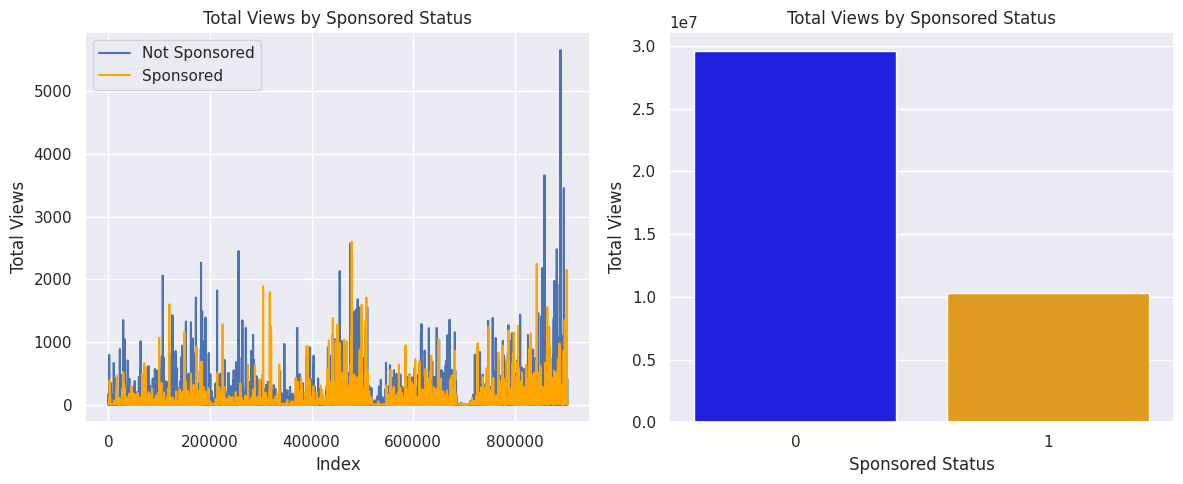

In [24]:
df_views_sum = df_comp_post.groupby(['sponsored'])['views'].sum().reset_index()
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot line plot for both 'Not Sponsored' and 'Sponsored'
sns.lineplot(x='index', y='views', data=df_comp_post[df_comp_post['sponsored'] == 0].reset_index(), ax=axs[0], label='Not Sponsored')
sns.lineplot(x='index', y='views', data=df_comp_post[df_comp_post['sponsored'] == 1].reset_index(), ax=axs[0], label='Sponsored', color='orange')

axs[0].set_xlabel('Index')
axs[0].set_ylabel('Total Views')
axs[0].set_title('Total Views by Sponsored Status')
axs[0].legend()

# Plot bar plot for total views by sponsored status
sns.barplot(x='sponsored', y='views', data=df_views_sum, palette=['blue', 'orange'], ax=axs[1])

axs[1].set_xlabel('Sponsored Status')
axs[1].set_ylabel('Total Views')
axs[1].set_title('Total Views by Sponsored Status')

plt.tight_layout()
plt.show()


### From above observation we can see that sponsored job applications are outperformed by non sponsored job applications which got significantly more views more than double the views for sponsored job applications. Therefore, we can understand that companies should tend to post their job applications without sponsoring from the platforms.